## Perceptron Class
M.Dostie

ML Classifier class implementing a 'Rosenblatt Perceptron'


This class trains via a 'fit' function, which internally calculates an input vector's class via a 'predict' function, then calculates the error and updates feature weights to the perceptron until 'hopefully' convergence


In [75]:
import numpy as np
class Perceptron(object):
    '''Perceptron Classifier
    Parameters:
    ===========
    eta : float
        Learning rate (0.0 to 1.0)
    n_iter : int
        Number of iterations over training dataset
        
    Attributes:
    ===========
    w_ : 1d-array
        Weights after fitting
    errors_ : list
        Number of misclassifications in every epoch
        (an 'epoch' is a pass over the training set)
    '''
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y, log=False):
        '''Fit training data
        
        Initializes the weights (self.w_) to a zero vector of
        size m+1, where m is the number of dimensions (features),
        and add 1 for the zero-weight (i.e. the threshold).
        Then loop over the samples and update the weights according
        to the learning rule. Collect the number of misclassifications
        in errors_ during each epoch
        
        Takes in X (training samples) and y (target labels)
        
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the
            number of samples, and n_features is the 
            number of features
        y : array-like, shape = [n_samples]
            Target values, vector
            
        Returns
        -------
        self : object
        '''
        
        if(log):
            self.log_ = open('perceptron.log', 'w')
            self.log_.write("Perceptron weight logging...\n")
        
        # length of the weight vector is the # of features,
        # which is the width of the 2-D training vector X. One
        # array slot is added for the zero weight (theta) threshold
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        if(log):
            self.log_.write(np.array2string(self.w_, separator=","))
            self.log_.write(" \n")

        for _ in range(self.n_iter):
            errors = 0
            counter = 1
            for xi, target in zip(X,y):
                prediction = self.predict(xi)
                update = self.eta * (target - prediction)
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
                if(log):
                    self.log_.write("{}: X: {}, y: {}, pred: {} w: ".format(
                        counter,
                        np.array2string(xi, separator=","),
                        target,
                        prediction
                        ))
                    self.log_.write(np.array2string(self.w_, separator=",")) 
                    self.log_.write(" errors: {}, update: {}, \n".format(
                            errors, update))
                    counter += 1
            self.errors_.append(errors)
        if(log):
            self.log_.close()
        return self
    
    def net_input(self, X):
        '''Caclaulate net input
        This is done via numpy vector dot product of the 
        transpose of the weights (w_) and the X vector
        
        The w[0] is the threshold, w[1:] are the actual 
        weights calculated via 'fit'
        '''
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) > 0.0, 1, -1)
    

In [6]:
import pandas as pd

In [15]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [23]:
df[0:50]

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
27,5.2,3.5,1.5,0.2,Iris-setosa
28,5.2,3.4,1.4,0.2,Iris-setosa
29,4.7,3.2,1.6,0.2,Iris-setosa
30,4.8,3.1,1.6,0.2,Iris-setosa
31,5.4,3.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
35,5.0,3.2,1.2,0.2,Iris-setosa


In [24]:
df[51:100]

,0,1,2,3,4
84,5.4,3.0,4.5,1.5,Iris-versicolor
83,6.0,2.7,5.1,1.6,Iris-versicolor
82,5.8,2.7,3.9,1.2,Iris-versicolor
77,6.7,3.0,5.0,1.7,Iris-versicolor
80,5.5,2.4,3.8,1.1,Iris-versicolor
79,5.7,2.6,3.5,1.0,Iris-versicolor
78,6.0,2.9,4.5,1.5,Iris-versicolor
86,6.7,3.1,4.7,1.5,Iris-versicolor
81,5.5,2.4,3.7,1.0,Iris-versicolor
87,6.3,2.3,4.4,1.3,Iris-versicolor


In [25]:
df[101:]

,0,1,2,3,4
133,6.3,2.8,5.1,1.5,Iris-virginica
132,6.4,2.8,5.6,2.2,Iris-virginica
131,7.9,3.8,6.4,2.0,Iris-virginica
126,6.2,2.8,4.8,1.8,Iris-virginica
129,7.2,3.0,5.8,1.6,Iris-virginica
128,6.4,2.8,5.6,2.1,Iris-virginica
127,6.1,3.0,4.9,1.8,Iris-virginica
135,7.7,3.0,6.1,2.3,Iris-virginica
130,7.4,2.8,6.1,1.9,Iris-virginica
136,6.3,3.4,5.6,2.4,Iris-virginica


In [22]:
# Only do this if you want to presort, the data is already sorted into:
# 50 entries of Iris-setosa
# 50 entries of Iris-versicolor
# 50 entries of Iris-virginica
# ... so this doesn't do much of anything
df.sort_values(by=4, inplace=True)

In [57]:
df[4].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: 4, dtype: int64

## Extract Versicolor and Setosa labels
Grab 50 labels each for training

In [27]:
import matplotlib.pyplot as plt
import numpy as np

In [32]:
# grab 'Iris-setosa' and 'Iris-versicolor', map to -1 and 1
y = df.iloc[0:100, 4].values
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [34]:
y = np.where(y == 'Iris-setosa', -1, 1)

In [58]:
len(y)

100

In [59]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [39]:
# Grab the feature vectors into 2D X vector
# We only want 2 features:
# 0: sepal length
# 2: petal length
X = df.iloc[0:100, [0,2]].values

In [60]:
X

array([[ 5.1,  1.4],
       [ 5.2,  1.5],
       [ 5.2,  1.4],
       [ 4.7,  1.6],
       [ 4.8,  1.6],
       [ 5.4,  1.5],
       [ 5.2,  1.5],
       [ 5.5,  1.4],
       [ 4.9,  1.5],
       [ 5. ,  1.2],
       [ 5.5,  1.3],
       [ 5. ,  1.6],
       [ 4.4,  1.3],
       [ 5. ,  1.3],
       [ 4.5,  1.3],
       [ 4.4,  1.3],
       [ 5. ,  1.6],
       [ 5.1,  1.9],
       [ 4.8,  1.4],
       [ 5.1,  1.6],
       [ 4.6,  1.4],
       [ 5.3,  1.5],
       [ 5. ,  1.4],
       [ 5.1,  1.5],
       [ 5. ,  1.6],
       [ 4.9,  1.5],
       [ 5.1,  1.7],
       [ 4.8,  1.9],
       [ 4.9,  1.4],
       [ 4.7,  1.3],
       [ 4.6,  1.5],
       [ 5. ,  1.4],
       [ 5.4,  1.7],
       [ 4.6,  1.4],
       [ 4.4,  1.4],
       [ 4.9,  1.5],
       [ 5.4,  1.5],
       [ 4.8,  1.6],
       [ 5. ,  1.5],
       [ 5.1,  1.5],
       [ 4.3,  1.1],
       [ 5.8,  1.2],
       [ 5.7,  1.5],
       [ 5.4,  1.3],
       [ 5.1,  1.4],
       [ 5.7,  1.7],
       [ 5.1,  1.5],
       [ 5.4,

## Scatter plot to visualize 
Sepal length and petal length


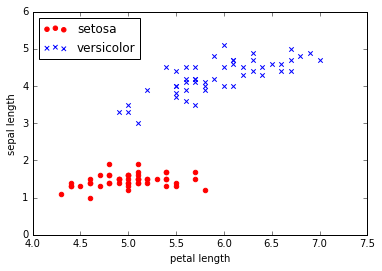

In [42]:
%matplotlib inline
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[51:100, 0], X[51:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

## Instantiate and train the perceptron
See if it converges

In [76]:
ppn = Perceptron(eta=0.1, n_iter=10)
# start the training via 'fit'
ppn.fit(X,y, True)

In [62]:
len(ppn.errors_)

10

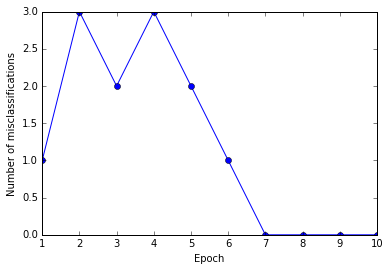

In [63]:
# Plot the number of errors in each epoch (up to n_iter)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of misclassifications')
plt.show()

## We appear to have converged after 7 epochs (iterations)
Create a plot of the decision boundary found during training

In [64]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot the class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], 
                   alpha=0.8, c=cmap(idx),
                   marker=markers[idx], label=cl)
        

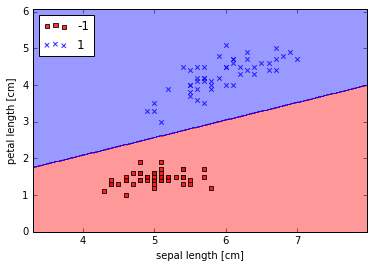

In [65]:
# use the above function to plot the decision regions
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()